In [11]:
import numpy as np
# Load the Type Ia supernova data
data = np.loadtxt("SN_data.txt")
print(data)
data.shape

[[1.50000000e-02 3.41635039e+01 1.61452857e-01]
 [1.50000000e-02 3.41114110e+01 2.13388870e-01]
 [1.50000000e-02 3.43797728e+01 2.17348535e-01]
 ...
 [1.37000000e+00 4.47901325e+01 3.20000000e-01]
 [1.39000000e+00 4.48304495e+01 5.90000000e-01]
 [1.55100000e+00 4.53310241e+01 4.00000000e-01]]


(511, 3)

In [12]:
import scipy.optimize as opt
import emcee
import matplotlib.pyplot as plt
from scipy import integrate



z = data[:, 0]  # Redshift
mu_obs = data[:, 1]  # Distance modulus
sigma_mu = data[:, 2]  # 1-sigma error in distance modulus

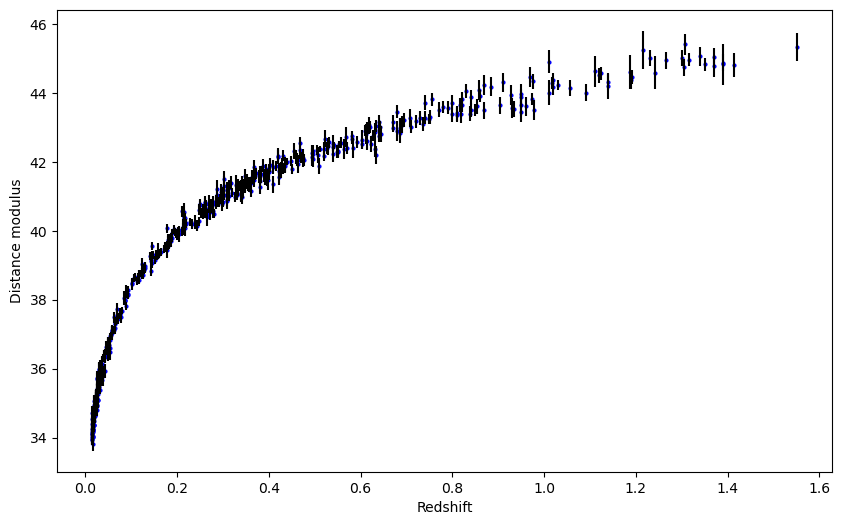

In [17]:
import numpy as np


# Plot the data
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(z, mu_obs, s=4, c='b')
ax.errorbar(z, mu_obs, yerr=sigma_mu, fmt='none', c='black')
ax.set_xlabel('Redshift')
ax.set_ylabel('Distance modulus')
plt.show()


In [14]:
# Define the cosmological model
import scipy

def distance_modulus(z, H0, Om, Olamda ):
    """Distance modulus as a function of redshift for a flat Lambda-CDM model"""
    c = 299792.458  # Speed of light in km/s
    integral = np.zeros_like(z)
    for i in range(len(z)):
        integrand = lambda zp: 1/np.sqrt(Om*(1+zp)**3 + Olamda )
        integral[i] = scipy.integrate.quad(integrand, 0, z[i])[0]
    d_L = (c/H0) * (1+z) * integral
    mu = 25 + 5*np.log10(d_L)
    return mu


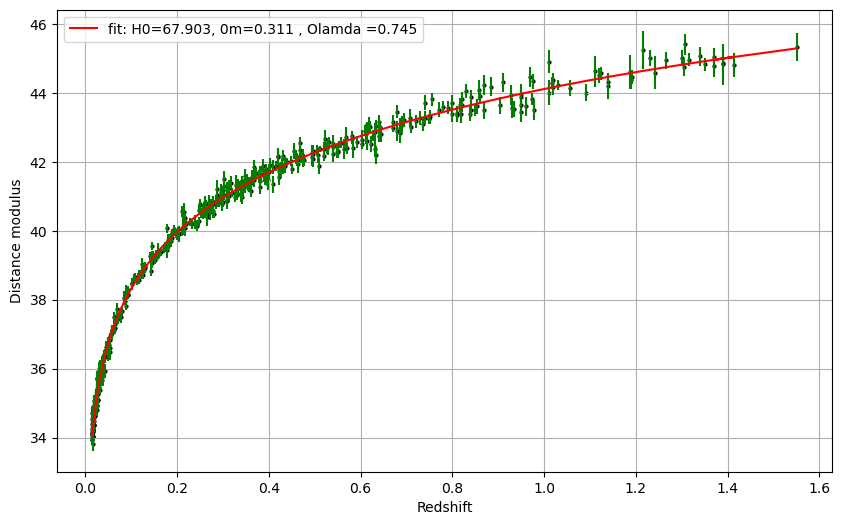

In [18]:
#fitting the curve 
from scipy.optimize import curve_fit
xdata = z 
ydata = mu_obs
popt, pcov = curve_fit(distance_modulus, xdata, ydata, bounds= (0, [100, 1., 1.]))



# Plot the data
fig,ax = plt.subplots(figsize = (10,6))
ax.scatter(z, mu_obs, s=4, c='black')
ax.errorbar(z, mu_obs, yerr=sigma_mu,ecolor= "g",fmt='none', c='black')
ax.plot(xdata, distance_modulus(xdata, *popt), 'r-', label='fit: H0=%5.3f, 0m=%5.3f , Olamda =%5.3f'  % tuple(popt))
ax.set_xlabel('Redshift')
ax.set_ylabel('Distance modulus')
ax.grid()
ax.legend(loc='upper left')
plt.show()


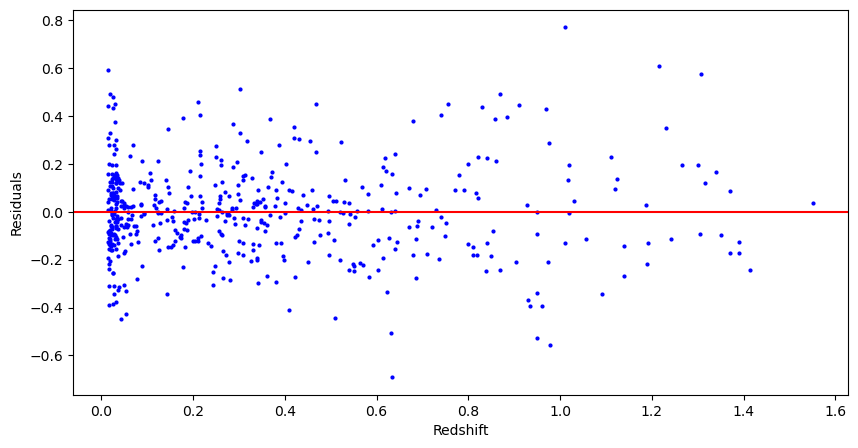

In [19]:
# Plot the residuals
residuals = mu_obs - distance_modulus(z, *popt)
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(z, residuals, s=4, c='b')
ax.axhline(y=0, color='r', linestyle='-')
ax.set_xlabel('Redshift')
ax.set_ylabel('Residuals')
plt.show()


In [20]:
# Define the chi-square function
def chi2(theta, x, y, yerr):
    H0, Om, Olamda = theta
    model = distance_modulus(x, H0, Om, Olamda)
    chi2 = np.sum(((y-model)/yerr)**2)
    return chi2

# Fit the model to the data using the chi-square method
result = opt.minimize(chi2, [70, 0.3, 0.7], args=(z, mu_obs, sigma_mu))
H0_ml, Om_ml, Olamda_ml = result.x

# Calculate the model predictions and residuals
mu_model = distance_modulus(z, H0_ml, Om_ml, Olamda_ml)
residuals = mu_obs - mu_model

# Calculate the chi-square value and reduced chi-square value
chi2_val = chi2(result.x, z, mu_obs, sigma_mu)
dof = len(z) - 3
red_chi2_val = chi2_val / dof



/tmp/ipykernel_9079/398673015.py:9: RuntimeWarning: invalid value encountered in sqrt
  integrand = lambda zp: 1/np.sqrt(Om*(1+zp)**3 + Olamda )
/tmp/ipykernel_9079/398673015.py:10: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral[i] = scipy.integrate.quad(integrand, 0, z[i])[0]
/tmp/ipykernel_9079/398673015.py:9: RuntimeWarning: invalid value encountered in sqrt
  integrand = lambda zp: 1/np.sqrt(Om*(1+zp)**3 + Olamda )
/tmp/ipykernel_9079/398673015.py:10: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral[i] = scipy.integrate.quad(integrand, 0, z[i])[0]
/tmp/ipykernel_9079/398673015.py:9: RuntimeWarning: invalid value encountered in sqrt
  integrand = lambda zp: 1/np.sqrt(Om*(1+zp)**3 + Olamda )
/tmp/ipykernel_9079/398673015.py:10: In

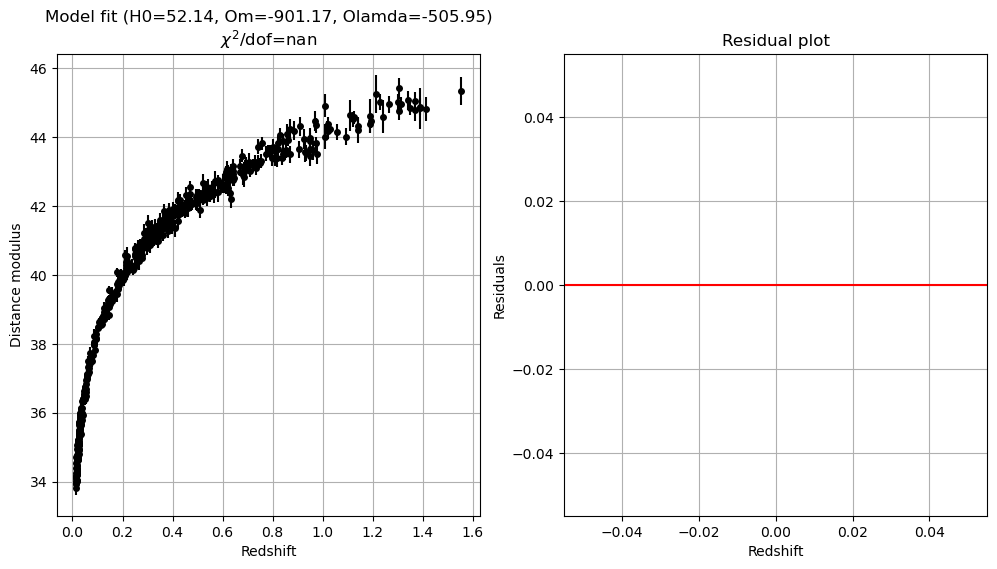

In [21]:
# Plot the model fit and residuals
fig, ax = plt.subplots(1, 2, figsize=(12,6))

# Model fit plot
ax[0].errorbar(z, mu_obs, yerr=sigma_mu, fmt='o', color='black', markersize=4)
ax[0].plot(z, mu_model, color='red')
ax[0].set_xlabel('Redshift')
ax[0].set_ylabel('Distance modulus')
ax[0].set_title('Model fit (H0={:.2f}, Om={:.2f}, Olamda={:.2f})\n$\chi^2$/dof={:.2f}'.format(H0_ml, Om_ml, Olamda_ml, red_chi2_val))
ax[0].grid()

# Residual plot
ax[1].scatter(z, residuals, s=4, color='black')
ax[1].axhline(y=0, color='red')
ax[1].set_xlabel('Redshift')
ax[1].set_ylabel('Residuals')
ax[1].set_title('Residual plot')
ax[1].grid()


In [ ]:
# Plot the 68% confidence interval for H0 and Om
n_samples = 10000
H0_samples = np
# Define the cosmological model
def distance_modulus(z, H0, Om, Olamda ):
    """Distance modulus as a function of redshift for a flat Lambda-CDM model"""
    c = 299792.458  # Speed of light in km/s
    integral = np.zeros_like(z)
    for i in range(len(z)):
        integrand = lambda zp: 1/np.sqrt(Om*(1+zp)**3 + Olamda )
        integral[i] = scipy.integrate.quad(integrand, 0, z[i])[0]
    d_L = (c/H0) * (1+z) * integral
    mu = 25 + 5*np.log10(d_L)
    return mu

# Calculate the chi-square value
y_model = distance_modulus(z, H0, Om, Olamda)
residuals = mu_obs - y_model
chi2 = np.sum(residuals**2/sigma_mu**2)
dof = len(z) - 3  # degrees of freedom
print(f"Chi-square value: {chi2:.2f}")
print(f"Degrees of freedom: {dof}")

In [ ]:
# Plot the data with fitted model line and confidence interval
fig, ax = plt.subplots(figsize=(10,6))

# Plot data with error bars
ax.errorbar(z, mu_obs, yerr=sigma_mu, fmt='o', markersize=4, capsize=3, color='black', label='Data')

# Plot the fitted model line
ax.plot(z, y_model, label=f"Model: H0={H0:.2f}, Om={Om:.2f}, Olamda={Olamda:.2f}", color='red')

# Calculate 1-sigma confidence interval
ci = 1  # 1-sigma
conf_int = []
for xi in z:
    dL = distance_modulus(xi, H0, Om, Olamda)
    y_model = 25 + 5*np.log10(dL)
    delta_chi2 = chi2 - (np.sum((mu_obs - y_model)**2/sigma_mu**2))
    conf_int.append(delta_chi2 <= ci)
ci_lower = np.array(conf_int) - 1
ci_upper = np.array(conf_int) + 1
ax.fill_between(z, ci_lower*25, ci_upper*25, color='grey', alpha=0.3, label=f"{ci}-sigma Confidence Interval")

ax.set_xlabel('Redshift')
ax.set_ylabel('Distance modulus')
ax.legend()
plt.show()
